### Load the two datasets MFCC_N_2500.npy and MFCC_S_2500.npy into arrays N and S respectively using np.load( filename ).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = np.load('MFCC_N_2500.npy')
S = np.load('MFCC_S_2500.npy')

### Append these two arrays to form the Dataset D=[N,S]


In [2]:
D = np.append(N, S, axis=0)

In [3]:
print (N.shape)
print (S.shape)
print (D.shape)

(2500, 60)
(2500, 60)
(5000, 60)


### Subject D to K-Means clustering with K = 100 

In [4]:
from sklearn.cluster import KMeans
K=100
kmeans = KMeans(n_clusters=K, random_state=42)
clusters=kmeans.fit_predict(D)

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Let PS[j] and PN[j] (PS[j] + PN[j]=1) be the respective proportions of shouted and normal feature points in each cluster j (j=1,…K). Report the plots of PS[j] and PN[j] against j=1,…K in two different colors (say, Red and Blue).

In [5]:
PS = np.zeros(100)
PN = np.zeros(100)
for i in range(len(D)):
    cluster_index = kmeans.labels_[i]
    if i < 2500: # Normal speech
        PN[cluster_index] += 1 
    else: # Shouted speech
        PS[cluster_index] += 1

max_pn=np.max(PN)
max_ps=np.max(PS)
print(max_ps, max_pn)
if(max_ps>max_pn):
    max_value=max_ps
else:
    max_value=max_pn
PS /= max_value # Normalize proportions
PN /= max_value
Tot=PS + PN
PS_PER = PS/Tot
PN_PER = PN/Tot

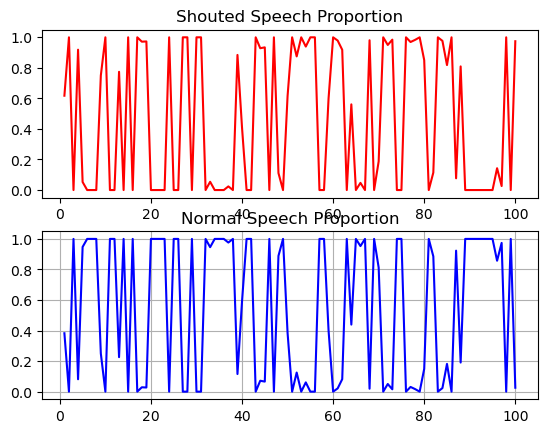

In [6]:
figure, axis = plt.subplots(2, 1)
axis[0].plot(range(1, 101), PS_PER, color='red')
axis[0].set_title("Shouted Speech Proportion")
axis[1].plot(range(1, 101), PN_PER, color='blue')
axis[1].set_title("Normal Speech Proportion")
plt.grid(True)
plt.show()